# Análise Exploratória do Dataset

A análise exploratória visa entender o comportamento e as características do dataset. As etapas dessa análise incluem:

1. **Visualização**
2. **Descrição dos tipos de dados**
3. **Estatísticas descritivas**
4. **Verificação de valores nulos**
5. **Verificação de duplicados**
6. **Valores únicos em cada coluna**
7. **Análise de desbalanceamento de classes**
8. **Distribuição dos dados**
9. **Matriz de correlação**
10. **Identificação de outliers**


In [15]:
import pandas as pd
import numpy as np
#from imblearn.under_sampling import TomekLinks
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df  = pd.read_csv('~/Documents/Itau-Analise-de-Credito/Inputs/dataset_analise_credito.csv')

In [17]:
df.shape

(5000, 12)

In [18]:
df.head()

,idade,salario,tempo_emprego,score_credito,limite_cartao,dividas,possui_carro,possui_casa,estado_civil,numero_dependentes,renda_extra,concede_credito
0,45,4152.480636,2.964516,499,8363.289643,3,sim,nao,casado,0,0,0
1,38,4093.171783,4.083502,541,10193.921339,4,sim,nao,solteiro,0,0,1
2,47,1408.713655,3.207857,538,2908.271761,8,sim,nao,solteiro,2,0,0
3,58,4339.819617,5.331254,602,6193.766870,3,sim,nao,casado,3,0,0
4,37,6465.658164,8.591536,464,12472.568673,5,sim,nao,divorciado,0,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idade               5000 non-null   int64  
 1   salario             4800 non-null   float64
 2   tempo_emprego       4900 non-null   float64
 3   score_credito       5000 non-null   int64  
 4   limite_cartao       4800 non-null   float64
 5   dividas             5000 non-null   int64  
 6   possui_carro        5000 non-null   object 
 7   possui_casa         5000 non-null   object 
 8   estado_civil        5000 non-null   object 
 9   numero_dependentes  5000 non-null   int64  
 10  renda_extra         5000 non-null   int64  
 11  concede_credito     5000 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 468.9+ KB


In [20]:
df.describe()

,idade,salario,tempo_emprego,score_credito,limite_cartao,dividas,numero_dependentes,renda_extra,concede_credito
count,5000.000000,4800.000000,4900.000000,5000.00000,4800.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,39.688400,5261.504267,5.029796,604.06900,9954.886023,4.588600,1.991400,0.012600,0.202800
std,12.211828,6493.988241,2.988671,172.63751,4132.112462,2.879828,1.409867,0.111551,0.402125
min,1.000000,-2673.311097,-5.126737,300.00000,-5894.309698,0.000000,0.000000,0.000000,0.000000
25%,32.000000,3632.006448,3.015201,454.00000,7147.481899,2.000000,1.000000,0.000000,0.000000
50%,40.000000,4972.523527,5.023610,608.00000,9968.963838,5.000000,2.000000,0.000000,0.000000
75%,48.000000,6369.374243,7.033596,755.00000,12692.334081,7.000000,3.000000,0.000000,0.000000
max,105.000000,195262.000000,15.286731,899.00000,23688.471712,9.000000,4.000000,1.000000,1.000000


In [21]:
#Verifica se há valores nulos
df.isnull().sum()

idade                   0
salario               200
tempo_emprego         100
score_credito           0
limite_cartao         200
dividas                 0
possui_carro            0
possui_casa             0
estado_civil            0
numero_dependentes      0
renda_extra             0
concede_credito         0
dtype: int64

In [22]:
#Verifica se há duplicados
df.duplicated().sum()

np.int64(0)

In [23]:
#Verifica quantos valores distintos há em cada coluna
df.nunique()

idade                   84
salario               4800
tempo_emprego         4900
score_credito          600
limite_cartao         4800
dividas                 10
possui_carro             2
possui_casa              2
estado_civil             3
numero_dependentes       5
renda_extra              2
concede_credito          2
dtype: int64

In [24]:
# verifica o balanceamento das classes
#Conclusão: classe desbalanceada. 

df['concede_credito'].value_counts()

concede_credito
0    3986
1    1014
Name: count, dtype: int64

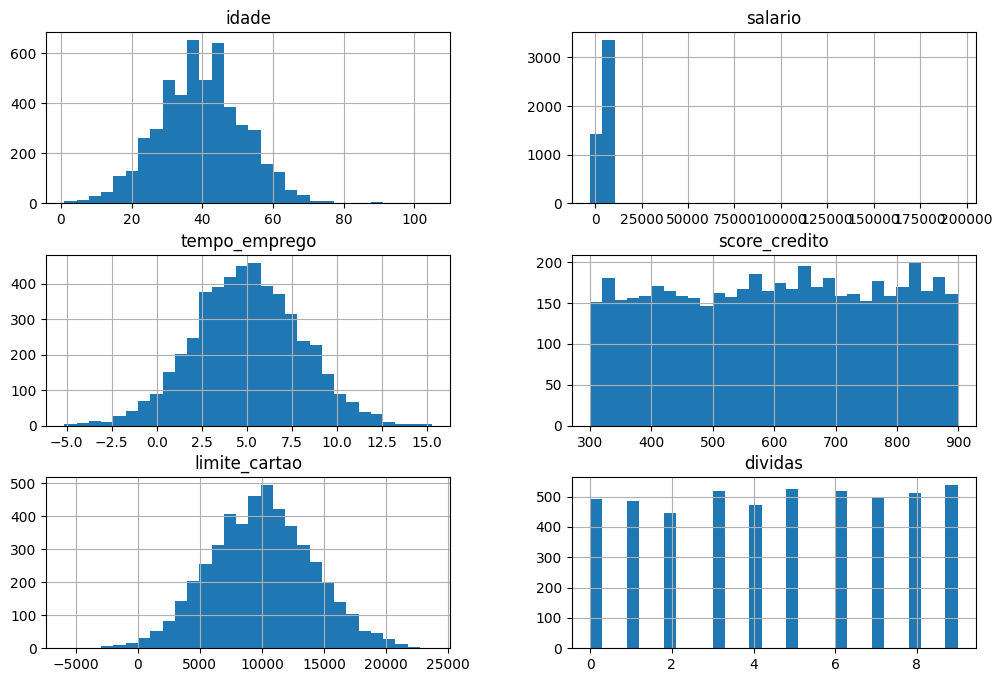

In [25]:
#analisando distribuição das variáveis numéricas
num_vars = ["idade", "salario", "tempo_emprego", "score_credito", "limite_cartao", "dividas"]
df[num_vars].hist(figsize=(12, 8), bins=30)
plt.show()

Conclusão

Distribuição normal:
- idade
- tempo de emprego
- limite_cartao

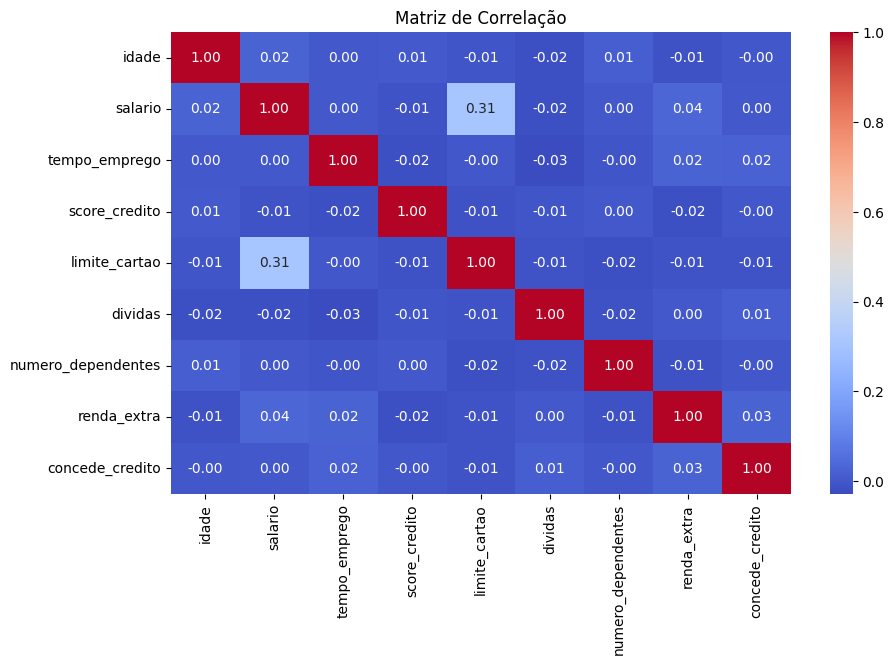

In [26]:
#analisando correlação entre as features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Conclusão: 

Features correlacionadas:

- limite_cartao x tempo_emprego
- salario x limite_cartao

Feature correlacionadas ao target:

- tempo_emprego
- renda_extra
- dividas

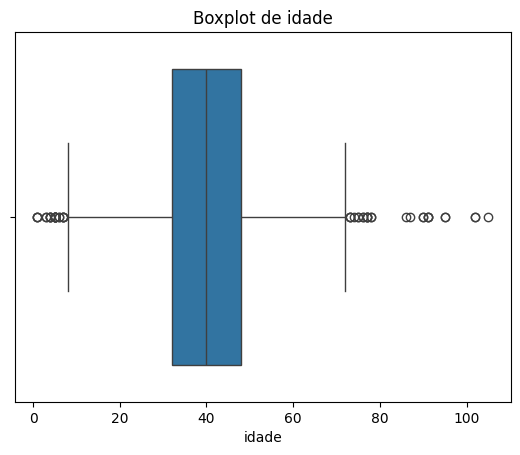

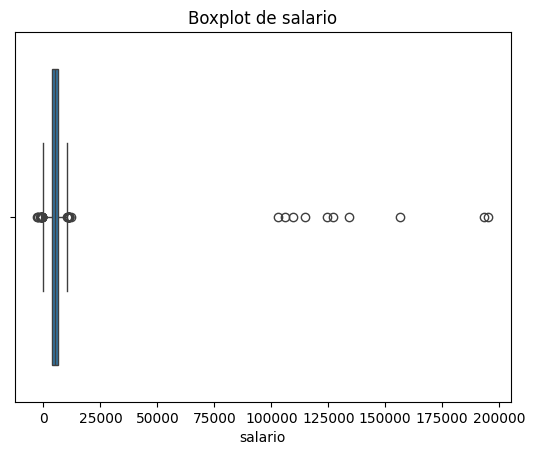

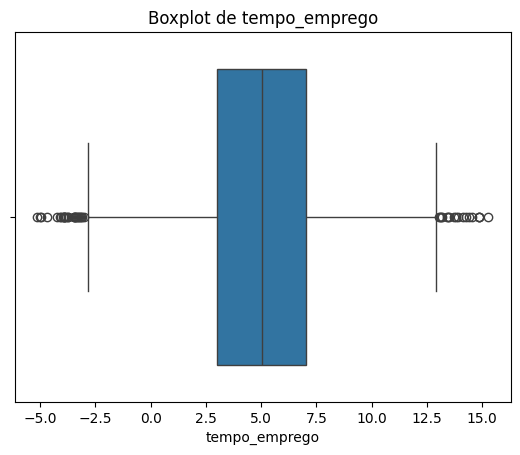

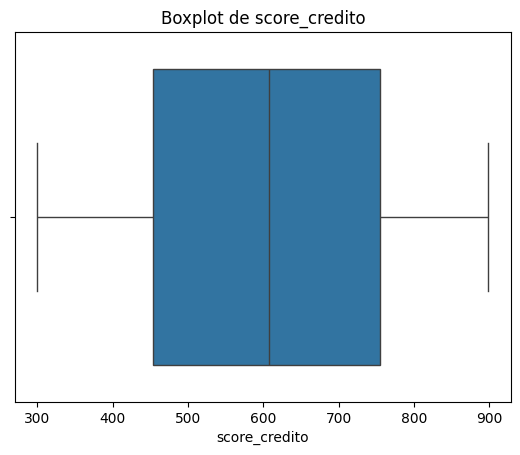

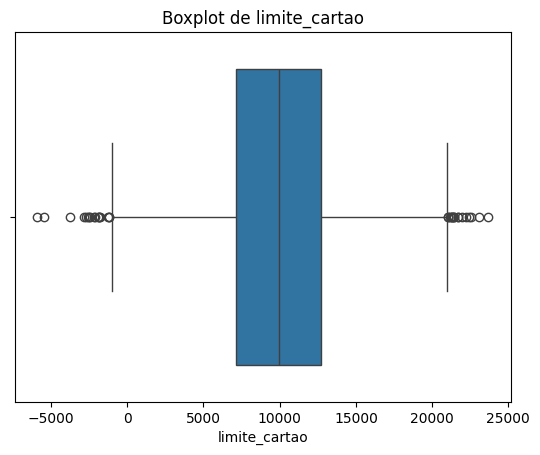

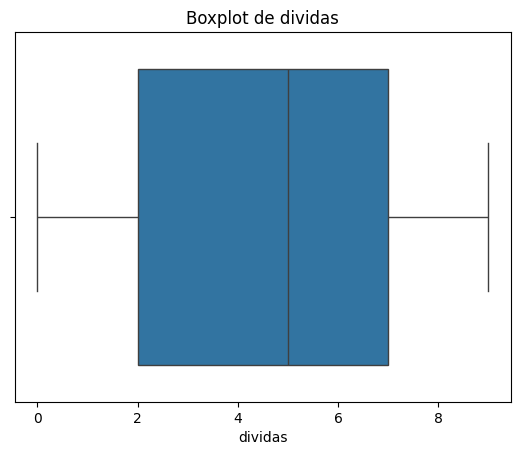

In [27]:
#analisando presença de outliers
for col in num_vars:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

conclusão:

Features com outliers:

- idade
- salario
- tempo emprego
- limite_cartão

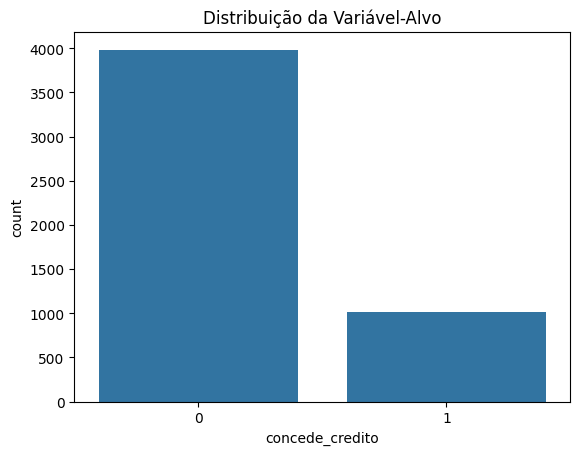

In [28]:
#analisando balanceamento das classes
sns.countplot(x=df["concede_credito"])
plt.title("Distribuição da Variável-Alvo")
plt.show()
